In [1]:
# some code implemented from youtube tutorial from Madhav Thaker
# https://github.com/madhavthaker/spotify-recommendation-system

TODO:
Finish creating recommendations and add for example nlp, one hot encoding and more.

Create a like system from recommendations

In [2]:
import pandas as pd
import numpy as np
import json
from IPython.display import Image
from IPython.core.display import display, HTML
import itertools
import sys
import re
import os
import matplotlib.pyplot as plt
from skimage import io
from IPython.display import Image

# Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

url = os.getcwd()

In [3]:
from secrets import client_id, client_secret

scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

# Spotify access
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

token = util.prompt_for_user_token(scope, client_id= client_id, client_secret=client_secret, redirect_uri='http://localhost:8881/')
sp = spotipy.Spotify(auth=token)


spotify_username = sp.current_user()['id']

In [4]:
def get_users_playlists():
    playlist_names = {}
    playlist_photos = {}
    
    for i in sp.current_user_playlists()['items']:
        playlist_names[i['name']] = i['uri'].split(':')[2]
        playlist_photos[i['uri'].split(':')[2]] = i['images'][0]['url']
    
    return playlist_names, playlist_photos

# Call get_users_playlists()
playlist_names, playlist_photos = get_users_playlists()

In [5]:
playlist_names

{'New Playlist 2': '5e8ijEDzlaB0y9apSoZNBI',
 'Tyler Bates – The Punisher (Original Soundtrack) 2': '3qt3t2qfyWSli9F6C9C3SF',
 'Globus – Epicon (UK Version)': '25sJ1ieBzb2AVPS9GaZhKm',
 's': '2L0LTJqWOFFI8qPqkDVjKG',
 'Immediate – Trailerhead: Triumph': '71DD8rTMqJB4bnFRdS1Jz7',
 'Electric Romeo – Immediate': '2aL9qUB2A6vc72I4AwrWlt',
 'Highway man': '4thvxQYvACp32gZguRAiEw',
 'party mood': '7MIO3PrQ0ZXdPobIpHOc5a',
 'Southpaw (Music From And Inspired By The Motion Picture)': '0kF5WxQpwIlFG130bWovut',
 'Work Hard, Play Hard – Wiz Khalifa': '1CavHtskIP3Dp0r9RCwXpY',
 'From edits': '5Yi5I6uqMn9oyV3RhvUVNm',
 'beuty': '7K0flcn5YDOXxPRhChKzre',
 'OAZ': '0RVTSPELkBvNXUw27BUC0R',
 'Eyeex': '2zqTk2BwhJx4CaqhwZ40RK',
 'Icelandic Music | Ragnarsmedia': '2eyFd9OYGYRFG1WknFYfTy',
 'Íslenskt': '4jp0RPWEON6B3hbLu6f1N4',
 'Grime ': '3VsZqGKOP5E6pcixUKg8zt',
 'Ultra 1.0': '0fQrVALjgMV5ckiOG6Lw0u',
 'Ultra 2.0': '6N1CYumwsQ6hScprqxmfsL',
 'Ultra 3.0': '1thpoCGLWqyLpPMFli6dHD',
 '21': '3WCO6yNpxaBEtRVT

In [6]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [7]:
#sp.audio_features("17DjxJJG1NHXg1VatxfFfU")

In [8]:
def get_track_features(track_id):
    audio_features = sp.audio_features(track_id)[0]
    track_out = {
        'acousticness': audio_features['acousticness'],
        'danceability': audio_features['danceability'],
        'duration_ms': audio_features['duration_ms'],
        'energy': audio_features['energy'],
        'instrumentalness': audio_features['instrumentalness'],
        'liveness': audio_features['liveness'],
        'loudness': audio_features['loudness'],
        'mode': audio_features['mode'],
        'speechiness': audio_features['speechiness'],
        'tempo': audio_features['tempo'],
        'valence': audio_features['valence']
    }
    return track_out

In [55]:
def get_track_info(playlist_id,tracks, number):
    # Track
    track = tracks[number]
    added_by = track['added_by']['id']
    track_info = track['track']
    track_artist = track_info['artists'][0]
    track_album = track_info['album']

    # Informations about the track
    id = track_info['id']
    name = track_info['name']
    date_added = track['added_at']
    explicit = track_info['explicit']
    popularity = track_info['popularity']
    link = track_info['external_urls']['spotify']
    preview_url = track_info['preview_url']
    image_url = track_album['images'][1]['url']
    release_date = track_album["release_date"]
    
    # Informations about the artists
    artist_id = track_artist['id']
    artist_name = track_artist['name']
    
    ## audio features
    audio_features = sp.audio_features(id)[0]
    print(audio_features.keys())
    #track_features = get_track_features(id) 
    
    #'playlist_id': playlist_id,
    #'date_added': date_added,
    track_out = {
        'id': id,
        'name': name,
        'link': link,
        'popularity': popularity,
        'image_url': image_url,
        'preview_url': preview_url,
        'artist_id': artist_id,
        'artist_name': artist_name,
        'explicit': explicit,
        'release_date': release_date,
        'acousticness': audio_features['acousticness'],
        'danceability': audio_features['danceability'],
        'duration_ms': audio_features['duration_ms'],
        'energy': audio_features['energy'],
        'instrumentalness': audio_features['instrumentalness'],
        'liveness': audio_features['liveness'],
        'loudness': audio_features['loudness'],
        'mode': audio_features['mode'],
        'speechiness': audio_features['speechiness'],
        'tempo': audio_features['tempo'],
        'valence': audio_features['valence']
    }

    return track_out

#test_track_info = specific_playlist_songs("5Yi5I6uqMn9oyV3RhvUVNm")
#test_track_info

In [10]:
def specific_playlist_songs(id_playlist):
    track_info = []
    for playlist_name, playlist_id in playlist_names.items():
        if(str(playlist_id) == id_playlist):
            tracks = get_playlist_tracks(spotify_username, playlist_id)
            for track_number in range(0, len(tracks)):
                track_info.append(get_track_info(playlist_id, tracks, track_number))
    return pd.DataFrame(track_info)

def get_all_playlist_songs():
    track_info = []
    for playlist_name, playlist_id in playlist_names.items():
        tracks = get_playlist_tracks(spotify_username, playlist_id)
        for track_number in range(0, len(tracks)):
            track_info.append(get_track_info(playlist_id, tracks, track_number))
    return pd.DataFrame(track_info)    


In [56]:
x = specific_playlist_songs("5Yi5I6uqMn9oyV3RhvUVNm")

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechi

In [42]:
from_edits_playlist = specific_playlist_songs("5Yi5I6uqMn9oyV3RhvUVNm")
from_isx_playlist = specific_playlist_songs("4jp0RPWEON6B3hbLu6f1N4")
from_edits_playlist
#from_edits_playlist

,id,name,link,popularity,image_url,preview_url,artist_id,artist_name,explicit,release_date,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,1iTJWaXWJE03Ek1qWGOfAo,This Night,https://open.spotify.com/track/1iTJWaXWJE03Ek1...,42,https://i.scdn.co/image/ab67616d00001e022a9191...,https://p.scdn.co/mp3-preview/2948d6637d563e18...,0xccdX954kn4RxZypGF7KH,Black Lab,False,2013-02-19,0.008540,0.619,209627,0.493,0.244000,0.0940,-7.740,1,0.0259,132.011,0.386
1,5KGbRvZyVyKP2AEJMHErB4,Old Yellow Bricks,https://open.spotify.com/track/5KGbRvZyVyKP2AE...,68,https://i.scdn.co/image/ab67616d00001e02b1f8da...,https://p.scdn.co/mp3-preview/87d579931c809534...,7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,False,2007-04-22,0.000147,0.660,193227,0.837,0.000007,0.0788,-4.315,1,0.0682,135.158,0.757
2,15BQ7vEDv2LJuh8TxWIhtd,The Passenger,https://open.spotify.com/track/15BQ7vEDv2LJuh8...,74,https://i.scdn.co/image/ab67616d00001e024aa5f6...,None,33EUXrFKGjpUSGacqEHhU4,Iggy Pop,False,1977-08-29,0.094700,0.498,283360,0.889,0.000002,0.7330,-5.413,1,0.0546,134.880,0.696
3,1aJtyIMev4kW8IMUxOjn1Y,Glitter & Gold,https://open.spotify.com/track/1aJtyIMev4kW8IM...,56,https://i.scdn.co/image/ab67616d00001e02ef510a...,None,5tFRohaO5yEsuJxmMnlCO9,Barns Courtney,False,2017-02-03,0.345000,0.487,176147,0.626,0.000000,0.1970,-5.087,1,0.0383,170.002,0.352
4,1Q70pQzaBGWrWU16xrYLGb,Mrs. Robinson,https://open.spotify.com/track/1Q70pQzaBGWrWU1...,38,https://i.scdn.co/image/ab67616d00001e02969998...,https://p.scdn.co/mp3-preview/f558ed04819a4992...,6w7fc6IZlo5zwBaKT5jU1X,The Lemonheads,False,1998,0.000058,0.463,222160,0.932,0.002660,0.2980,-7.609,1,0.0436,107.355,0.740
5,17DjxJJG1NHXg1VatxfFfU,The Underdog,https://open.spotify.com/track/17DjxJJG1NHXg1V...,0,https://i.scdn.co/image/ab67616d00001e021aacf2...,None,0K1q0nXQ8is36PzOKAMbNe,Spoon,False,2007-07-10,0.060200,0.693,222320,0.646,0.001320,0.6780,-6.484,1,0.0313,145.116,0.890
6,2IZZqH4K02UIYg5EohpNHF,Zombie,https://open.spotify.com/track/2IZZqH4K02UIYg5...,82,https://i.scdn.co/image/ab67616d00001e02e2213d...,None,7t0rwkOPGlDPEhaOcVtOt9,The Cranberries,False,1994-10-03,0.015400,0.307,306427,0.635,0.004830,0.3660,-8.957,1,0.0339,166.973,0.304
7,3bINd6fURyFLT0sQwkjbCG,Over The Rainbow,https://open.spotify.com/track/3bINd6fURyFLT0s...,0,https://i.scdn.co/image/ab67616d00001e02b0e51b...,None,4ogvuDRerGhZfSf7TtzHlr,Israel Kamakawiwo'ole,False,2011-01-01,0.909000,0.677,212080,0.116,0.000026,0.0756,-15.703,1,0.0412,85.100,0.680
8,7aXK1UkGw6bDc2zr4YUpdJ,Hard-Core Troubadour,https://open.spotify.com/track/7aXK1UkGw6bDc2z...,46,https://i.scdn.co/image/ab67616d00001e02a352d8...,https://p.scdn.co/mp3-preview/efd06c8de4eadfaf...,2UBTfUoLI07iRqGeUrwhZh,Steve Earle,False,1996-03-01,0.004680,0.467,161053,0.915,0.000000,0.0756,-4.441,1,0.0448,140.185,0.850
9,5d1ix6uxnaiPzQpWjoOtrN,Bet on You,https://open.spotify.com/track/5d1ix6uxnaiPzQp...,48,https://i.scdn.co/image/ab67616d00001e026f1162...,https://p.scdn.co/mp3-preview/00a8fe897cbce6fb...,1wLFDPkWkMl7bNZvhmhxsG,The Man Who,False,2017-03-29,0.003230,0.528,242280,0.679,0.000067,0.1320,-4.363,1,0.0332,157.906,0.299


In [14]:
from skimage import io
import matplotlib.pyplot as plt

def cover_songs(df):
    image_url = df['image_url'].values
    plt.figure(figsize=(15,int(0.625 * len(image_url))))
    columns = 5
    
    for i, url in enumerate(image_url):
        plt.subplot(len(image_url) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

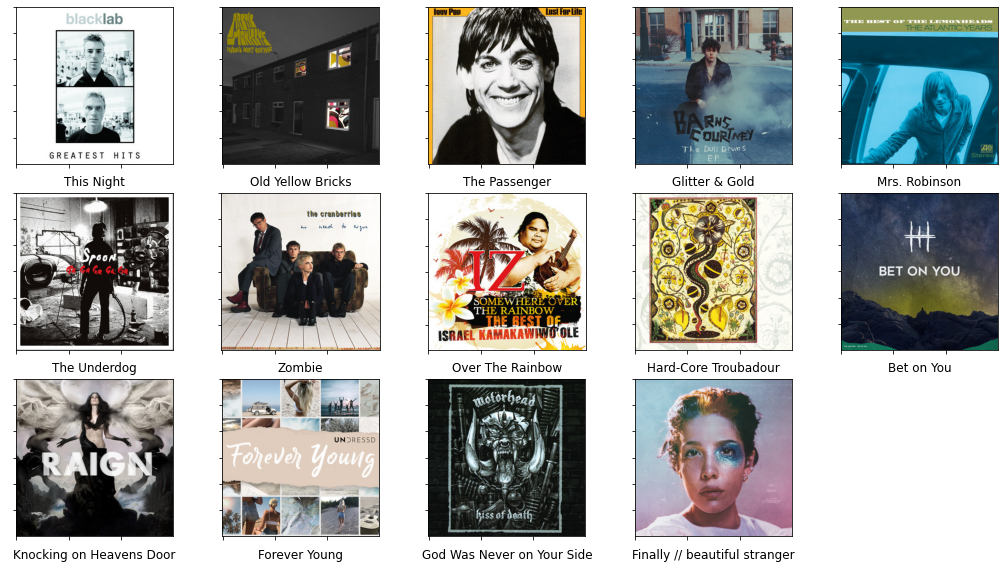

In [15]:
cover_songs(from_edits_playlist)

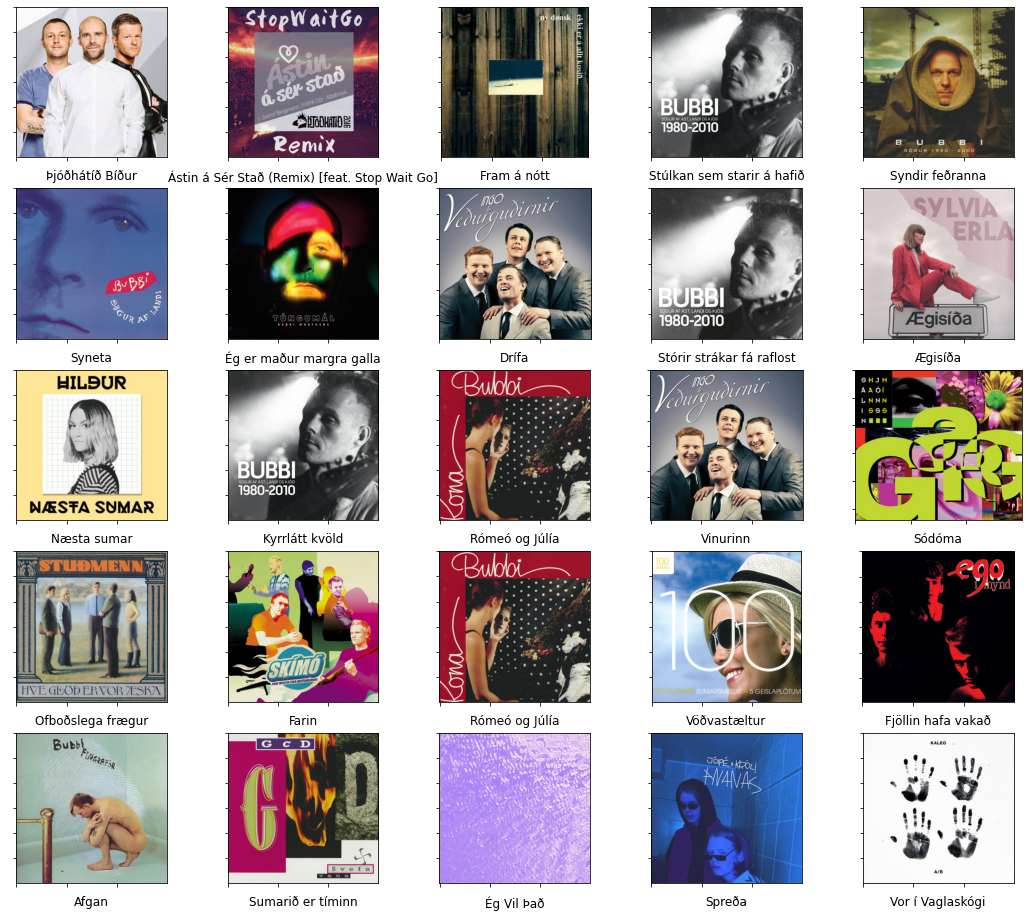

In [16]:
cover_songs(from_isx_playlist)

In [ ]:
# does artists genres consolidated, matter for our way ?

In [38]:
from_edits_playlist.head()

,playlist_id,id,name,link,popularity,image_url,preview_url,artist_id,artist_name,explicit,date_added,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,5Yi5I6uqMn9oyV3RhvUVNm,1iTJWaXWJE03Ek1qWGOfAo,This Night,https://open.spotify.com/track/1iTJWaXWJE03Ek1...,42,https://i.scdn.co/image/ab67616d00001e022a9191...,https://p.scdn.co/mp3-preview/2948d6637d563e18...,0xccdX954kn4RxZypGF7KH,Black Lab,False,2018-07-29T02:52:00Z,0.008540,0.619,209627,0.493,0.244000,0.0940,-7.740,1,0.0259,132.011,0.386
1,5Yi5I6uqMn9oyV3RhvUVNm,5KGbRvZyVyKP2AEJMHErB4,Old Yellow Bricks,https://open.spotify.com/track/5KGbRvZyVyKP2AE...,68,https://i.scdn.co/image/ab67616d00001e02b1f8da...,https://p.scdn.co/mp3-preview/87d579931c809534...,7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,False,2018-07-29T22:04:22Z,0.000147,0.660,193227,0.837,0.000007,0.0788,-4.315,1,0.0682,135.158,0.757
2,5Yi5I6uqMn9oyV3RhvUVNm,15BQ7vEDv2LJuh8TxWIhtd,The Passenger,https://open.spotify.com/track/15BQ7vEDv2LJuh8...,74,https://i.scdn.co/image/ab67616d00001e024aa5f6...,None,33EUXrFKGjpUSGacqEHhU4,Iggy Pop,False,2018-07-29T22:11:08Z,0.094700,0.498,283360,0.889,0.000002,0.7330,-5.413,1,0.0546,134.880,0.696
3,5Yi5I6uqMn9oyV3RhvUVNm,1aJtyIMev4kW8IMUxOjn1Y,Glitter & Gold,https://open.spotify.com/track/1aJtyIMev4kW8IM...,56,https://i.scdn.co/image/ab67616d00001e02ef510a...,None,5tFRohaO5yEsuJxmMnlCO9,Barns Courtney,False,2018-08-09T14:44:48Z,0.345000,0.487,176147,0.626,0.000000,0.1970,-5.087,1,0.0383,170.002,0.352
4,5Yi5I6uqMn9oyV3RhvUVNm,1Q70pQzaBGWrWU16xrYLGb,Mrs. Robinson,https://open.spotify.com/track/1Q70pQzaBGWrWU1...,38,https://i.scdn.co/image/ab67616d00001e02969998...,https://p.scdn.co/mp3-preview/f558ed04819a4992...,6w7fc6IZlo5zwBaKT5jU1X,The Lemonheads,False,2018-08-22T22:13:31Z,0.000058,0.463,222160,0.932,0.002660,0.2980,-7.609,1,0.0436,107.355,0.740


In [57]:
temp_playlist = from_edits_playlist

In [58]:
temp_playlist["pop_bucket"] = temp_playlist['popularity'].apply(lambda x: int(x/5))

In [59]:
temp_playlist["year"] = temp_playlist['release_date'].apply(lambda x: x.split('-')[0])

In [60]:
temp_playlist

,id,name,link,popularity,image_url,preview_url,artist_id,artist_name,explicit,release_date,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,year,pop_bucket
0,1iTJWaXWJE03Ek1qWGOfAo,This Night,https://open.spotify.com/track/1iTJWaXWJE03Ek1...,42,https://i.scdn.co/image/ab67616d00001e022a9191...,https://p.scdn.co/mp3-preview/2948d6637d563e18...,0xccdX954kn4RxZypGF7KH,Black Lab,False,2013-02-19,0.008540,0.619,209627,0.493,0.244000,0.0940,-7.740,1,0.0259,132.011,0.386,2013,8
1,5KGbRvZyVyKP2AEJMHErB4,Old Yellow Bricks,https://open.spotify.com/track/5KGbRvZyVyKP2AE...,68,https://i.scdn.co/image/ab67616d00001e02b1f8da...,https://p.scdn.co/mp3-preview/87d579931c809534...,7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,False,2007-04-22,0.000147,0.660,193227,0.837,0.000007,0.0788,-4.315,1,0.0682,135.158,0.757,2007,13
2,15BQ7vEDv2LJuh8TxWIhtd,The Passenger,https://open.spotify.com/track/15BQ7vEDv2LJuh8...,74,https://i.scdn.co/image/ab67616d00001e024aa5f6...,None,33EUXrFKGjpUSGacqEHhU4,Iggy Pop,False,1977-08-29,0.094700,0.498,283360,0.889,0.000002,0.7330,-5.413,1,0.0546,134.880,0.696,1977,14
3,1aJtyIMev4kW8IMUxOjn1Y,Glitter & Gold,https://open.spotify.com/track/1aJtyIMev4kW8IM...,56,https://i.scdn.co/image/ab67616d00001e02ef510a...,None,5tFRohaO5yEsuJxmMnlCO9,Barns Courtney,False,2017-02-03,0.345000,0.487,176147,0.626,0.000000,0.1970,-5.087,1,0.0383,170.002,0.352,2017,11
4,1Q70pQzaBGWrWU16xrYLGb,Mrs. Robinson,https://open.spotify.com/track/1Q70pQzaBGWrWU1...,38,https://i.scdn.co/image/ab67616d00001e02969998...,https://p.scdn.co/mp3-preview/f558ed04819a4992...,6w7fc6IZlo5zwBaKT5jU1X,The Lemonheads,False,1998,0.000058,0.463,222160,0.932,0.002660,0.2980,-7.609,1,0.0436,107.355,0.740,1998,7
5,17DjxJJG1NHXg1VatxfFfU,The Underdog,https://open.spotify.com/track/17DjxJJG1NHXg1V...,0,https://i.scdn.co/image/ab67616d00001e021aacf2...,None,0K1q0nXQ8is36PzOKAMbNe,Spoon,False,2007-07-10,0.060200,0.693,222320,0.646,0.001320,0.6780,-6.484,1,0.0313,145.116,0.890,2007,0
6,2IZZqH4K02UIYg5EohpNHF,Zombie,https://open.spotify.com/track/2IZZqH4K02UIYg5...,82,https://i.scdn.co/image/ab67616d00001e02e2213d...,None,7t0rwkOPGlDPEhaOcVtOt9,The Cranberries,False,1994-10-03,0.015400,0.307,306427,0.635,0.004830,0.3660,-8.957,1,0.0339,166.973,0.304,1994,16
7,3bINd6fURyFLT0sQwkjbCG,Over The Rainbow,https://open.spotify.com/track/3bINd6fURyFLT0s...,0,https://i.scdn.co/image/ab67616d00001e02b0e51b...,None,4ogvuDRerGhZfSf7TtzHlr,Israel Kamakawiwo'ole,False,2011-01-01,0.909000,0.677,212080,0.116,0.000026,0.0756,-15.703,1,0.0412,85.100,0.680,2011,0
8,7aXK1UkGw6bDc2zr4YUpdJ,Hard-Core Troubadour,https://open.spotify.com/track/7aXK1UkGw6bDc2z...,46,https://i.scdn.co/image/ab67616d00001e02a352d8...,https://p.scdn.co/mp3-preview/efd06c8de4eadfaf...,2UBTfUoLI07iRqGeUrwhZh,Steve Earle,False,1996-03-01,0.004680,0.467,161053,0.915,0.000000,0.0756,-4.441,1,0.0448,140.185,0.850,1996,9
9,5d1ix6uxnaiPzQpWjoOtrN,Bet on You,https://open.spotify.com/track/5d1ix6uxnaiPzQp...,48,https://i.scdn.co/image/ab67616d00001e026f1162...,https://p.scdn.co/mp3-preview/00a8fe897cbce6fb...,1wLFDPkWkMl7bNZvhmhxsG,The Man Who,False,2017-03-29,0.003230,0.528,242280,0.679,0.000067,0.1320,-4.363,1,0.0332,157.906,0.299,2017,9


In [17]:
## show all recommendations

In [18]:
## show bad recommendations (low popularity)

In [19]:
## show good recommendations (high popularity)